In [306]:
import pandas as pd 
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from subprocess import check_output
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from pandas import datetime
from sklearn.metrics import mean_squared_error
df = pd.read_csv("../Resources/btcjoin.csv", index_col='date', parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open','value','address','mined'])
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype("float")
print(df.tail())
df.to_csv('../Resources/colabbtc.csv')
#https://www.projectpro.io/article/how-to-build-arima-model-in-python/544


              price
date               
2022-10-21  19162.6
2022-10-22  19204.8
2022-10-23  19571.2
2022-10-24  19331.5
2022-10-25  20073.1


C:\Users\16474\AppData\Local\Temp\ipykernel_604\3472337568.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [307]:
df.dtypes

price    float64
dtype: object

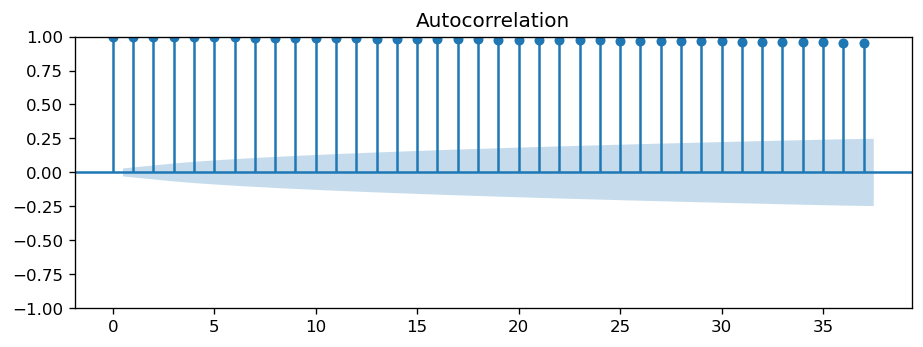

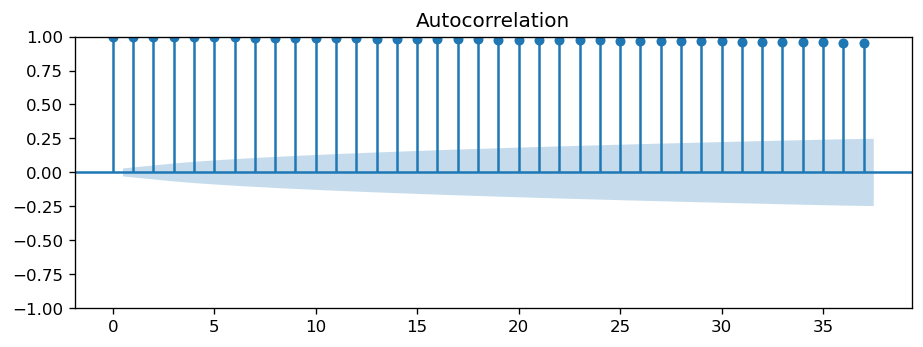

In [308]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plot_acf(df.price)


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


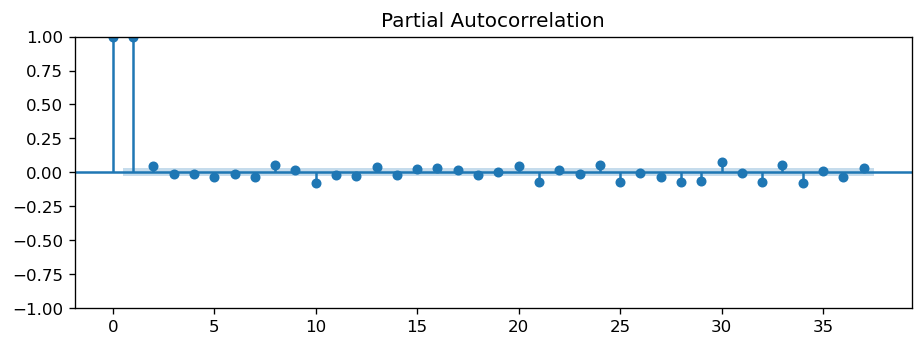

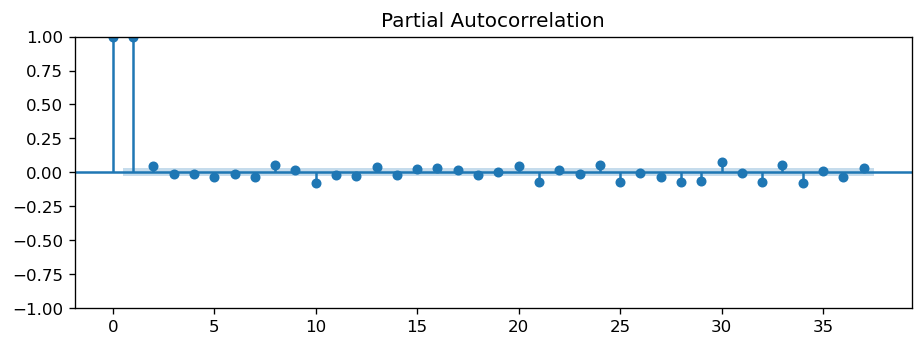

In [309]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plot_pacf(df.price)

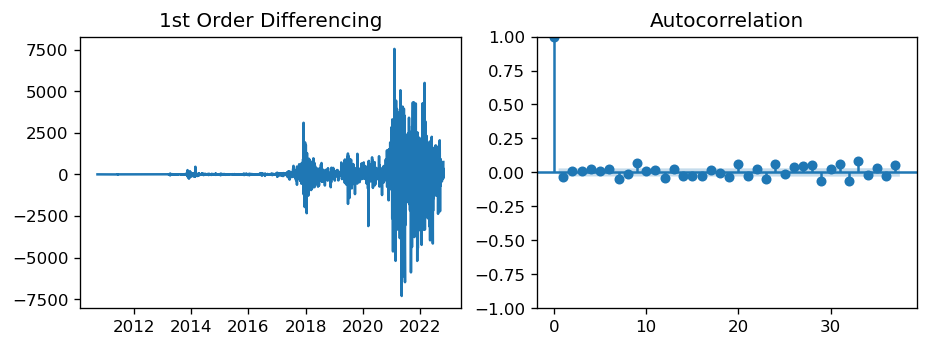

In [310]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.price.diff())

ax2 = f.add_subplot(122)
plot_acf(df.price.diff().dropna(), ax=ax2)
plt.show()

In [311]:
result = adfuller(df.price.dropna())
print('p-value', result[1])

result = adfuller(df.price.diff().dropna())
print('p-value', result[1])


p-value 0.3958551417121587
p-value 7.278050522529046e-19


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


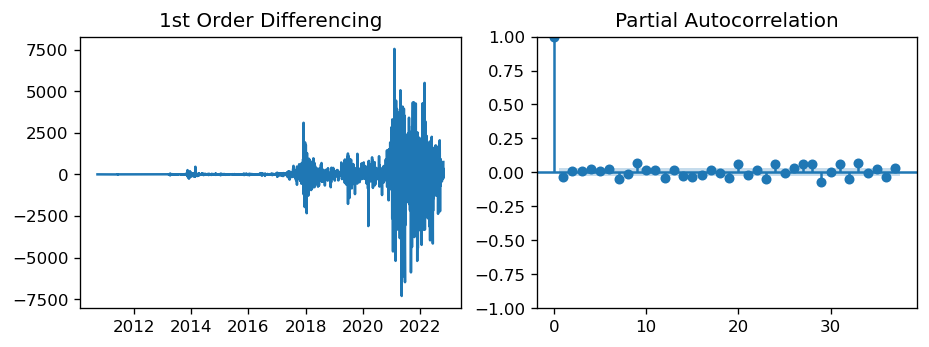

In [312]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.price.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.price.diff().dropna(), ax=ax2)
plt.show()

In [313]:
arima_model = ARIMA(df.price, order = (5,1,0))
model = arima_model.fit()
print(model.summary())

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 4386
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -34707.363
Date:                Thu, 17 Nov 2022   AIC                          69426.727
Time:                        21:26:42   BIC                          69465.042
Sample:                             0   HQIC                         69440.245
                               - 4386                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0368      0.007     -5.591      0.000      -0.050      -0.024
ar.L2          0.0082      0.006      1.357      0.175      -0.004       0.020
ar.L3          0.0107      0.007      1.639      0.1

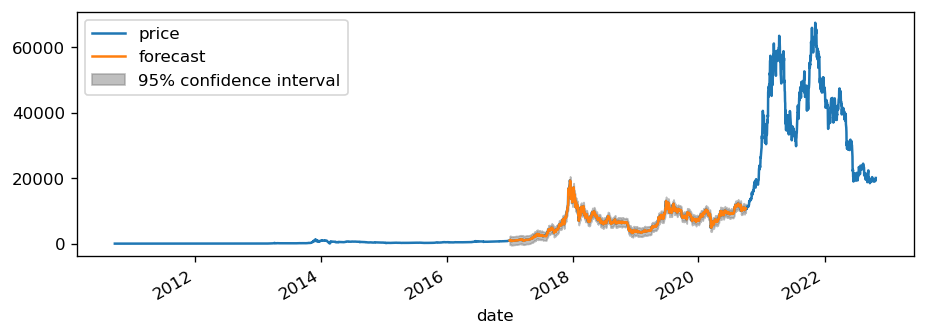

In [314]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, ax = plt.subplots()
ax = df.loc['2010':].plot(ax=ax)
plot_predict(model, '2017-01-01', '2020-10-01', ax=ax)

plt.show()

In [315]:
#ARIMA TEST 2

# 1ST Order differencing determines the parameter AR - order(AR-I-MA)
# Since 1st order diff made the data stationary then it is 1 in AR parameters

In [316]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
#https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830
# df['priceslog'] = np.log(df['price'])
# df = df.drop(columns=['price'])
df_train = df.sample(frac=0.8, random_state=25)
df_test = df.drop(df_train.index)

print(f"No. of training examples: {df_train.shape[0]}")
print(f"No. of testing examples: {df_test.shape[0]}")

No. of training examples: 3509
No. of testing examples: 877


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


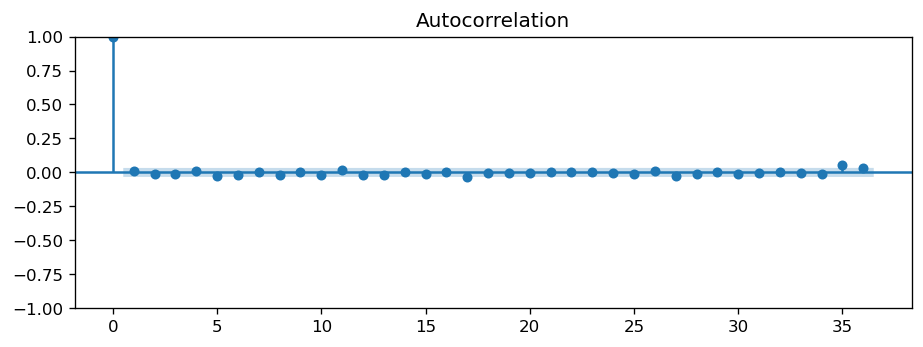

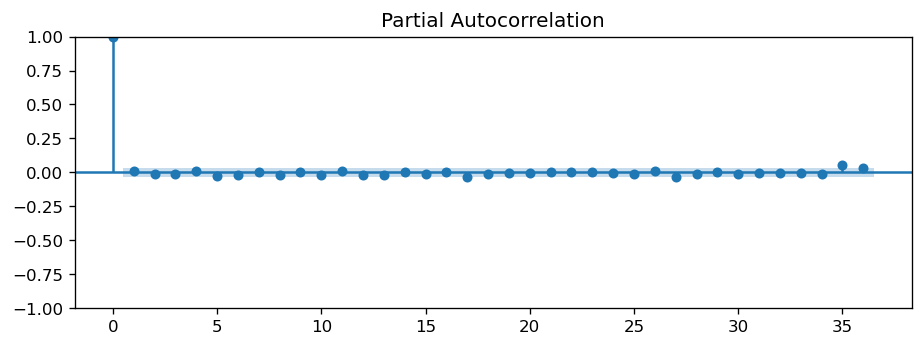

In [317]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [318]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


<AxesSubplot:xlabel='date'>

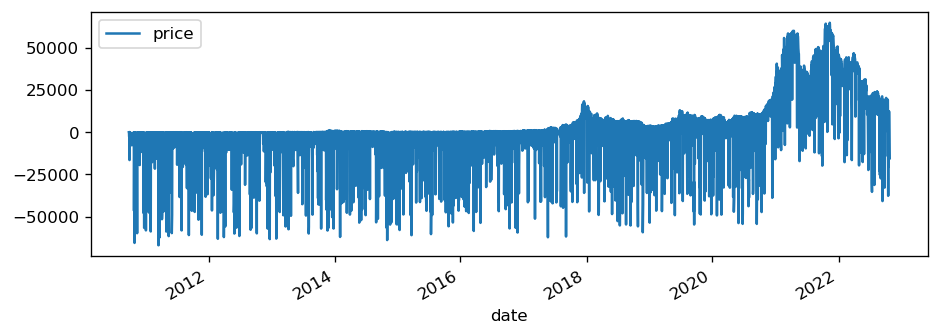

In [319]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


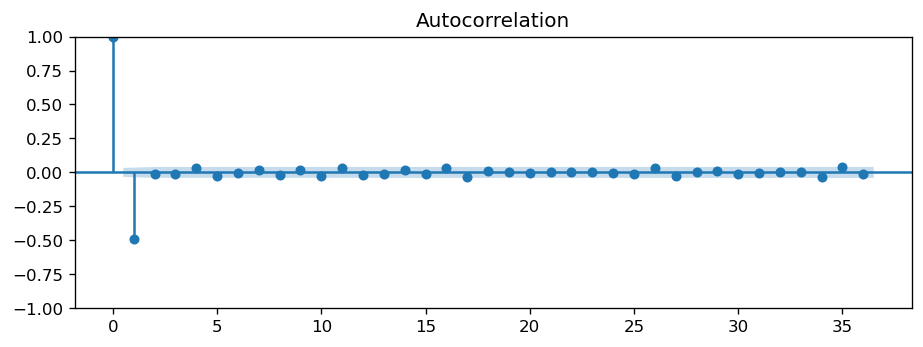

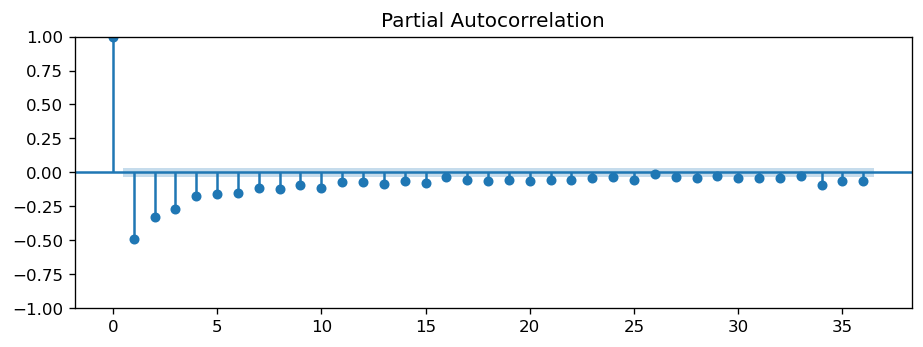

In [320]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [321]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 2.2275437704041318e-30


In [322]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(5,1,0))
# model_fit = model.fit()
# # print(model_fit.summary())

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-

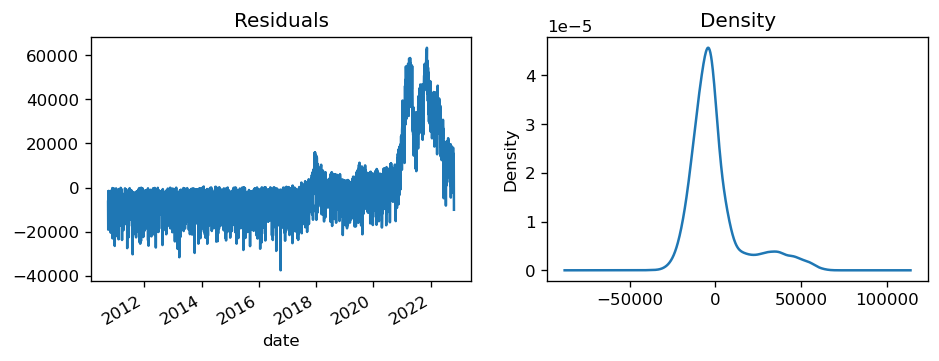

In [323]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


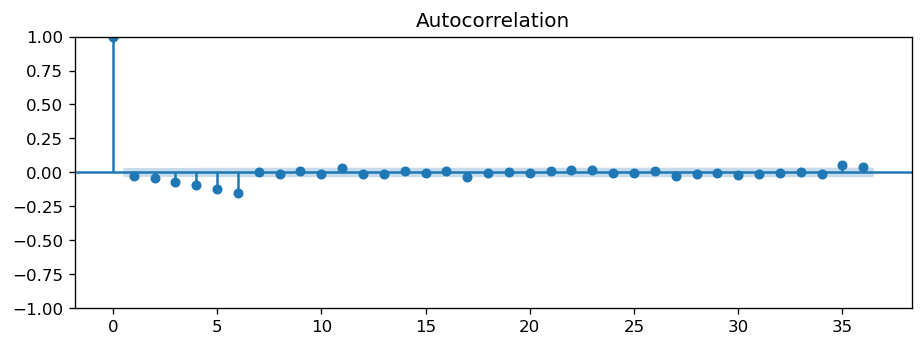

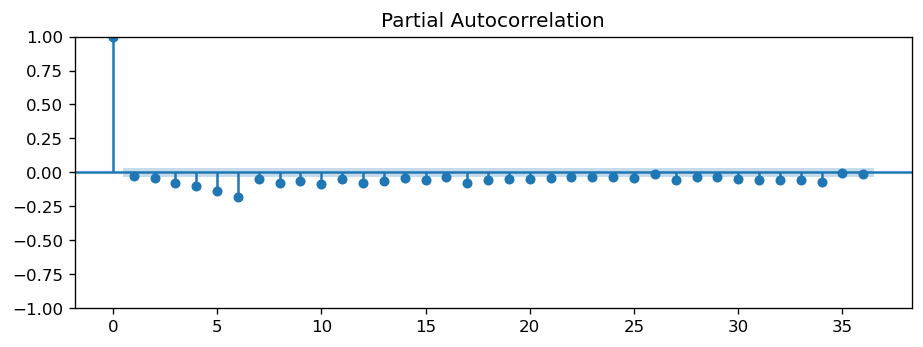

In [324]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 3509
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -38935.459
Date:                Thu, 17 Nov 2022   AIC                          77882.918
Time:                        21:26:44   BIC                          77919.895
Sample:                             0   HQIC                         77896.113
                               - 3509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8102      0.016    -49.837      0.000      -0.842      -0.778
ar.L2         -0.6532      0.021    -31.621      0.000      -0.694      -0.613
ar.L3         -0.4905      0.022    -22.451      0.0

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


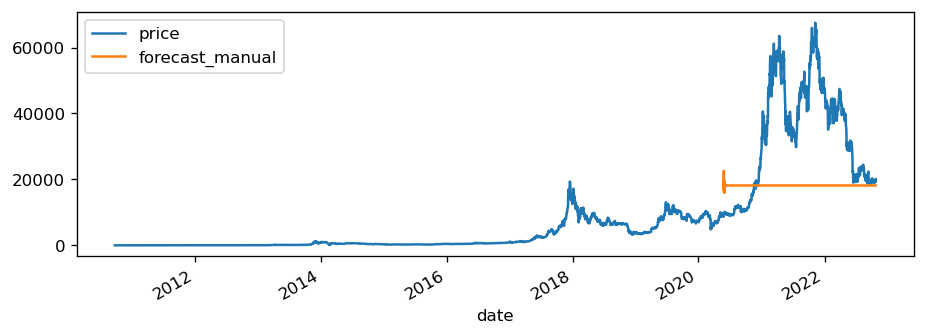

In [325]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df.plot()
mse = (mean_squared_error(df_test, forecast_test))
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))
print(mse)
print(rmse)

In [327]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['price'])

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -1.7692030079691388
p-value : 0.3958551417121587
#Lags Used : 31
Number of Observations : 4354


In [328]:
df['price First Difference'] = df['price'] - df['price'].shift(1)
df['Seasonal First Difference']=df['price']-df['price'].shift(12)
df.head()

,price,forecast_manual,price First Difference,Seasonal First Difference
date,,,,
2010-09-25,0.1,NaN,NaN,NaN
2010-09-26,0.1,NaN,0.0,NaN
2010-09-27,0.1,NaN,0.0,NaN
2010-09-28,0.1,NaN,0.0,NaN
2010-09-29,0.1,NaN,0.0,NaN


In [329]:
# Again testing if data is stationary
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.845730257549446
p-value : 1.6227240329837082e-14
#Lags Used : 31
Number of Observations : 4342


<AxesSubplot:xlabel='date'>

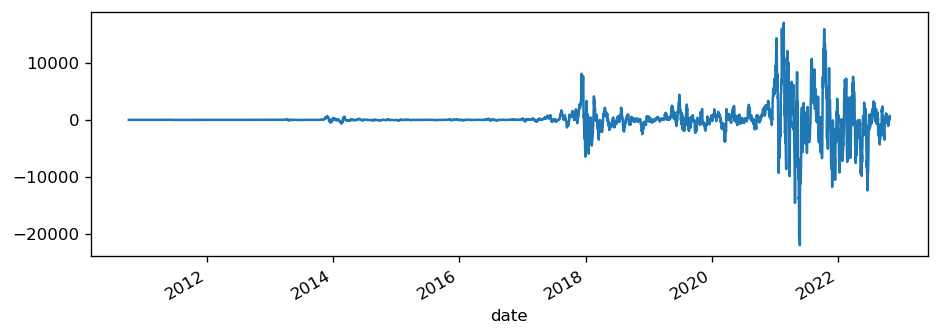

In [330]:
df['Seasonal First Difference'].plot()

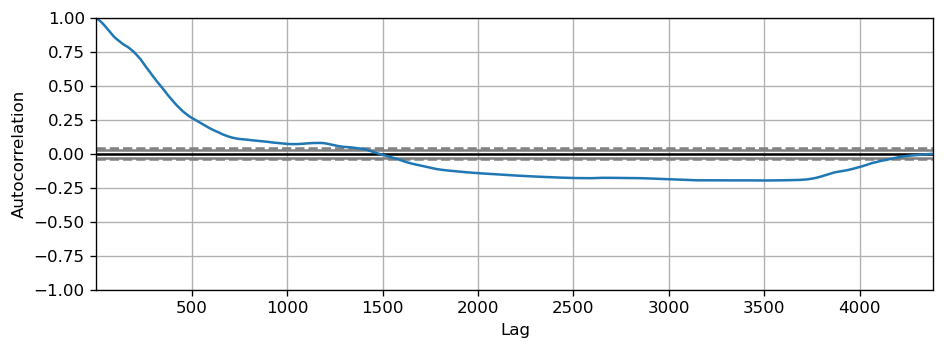

In [332]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['price'])
plt.show()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


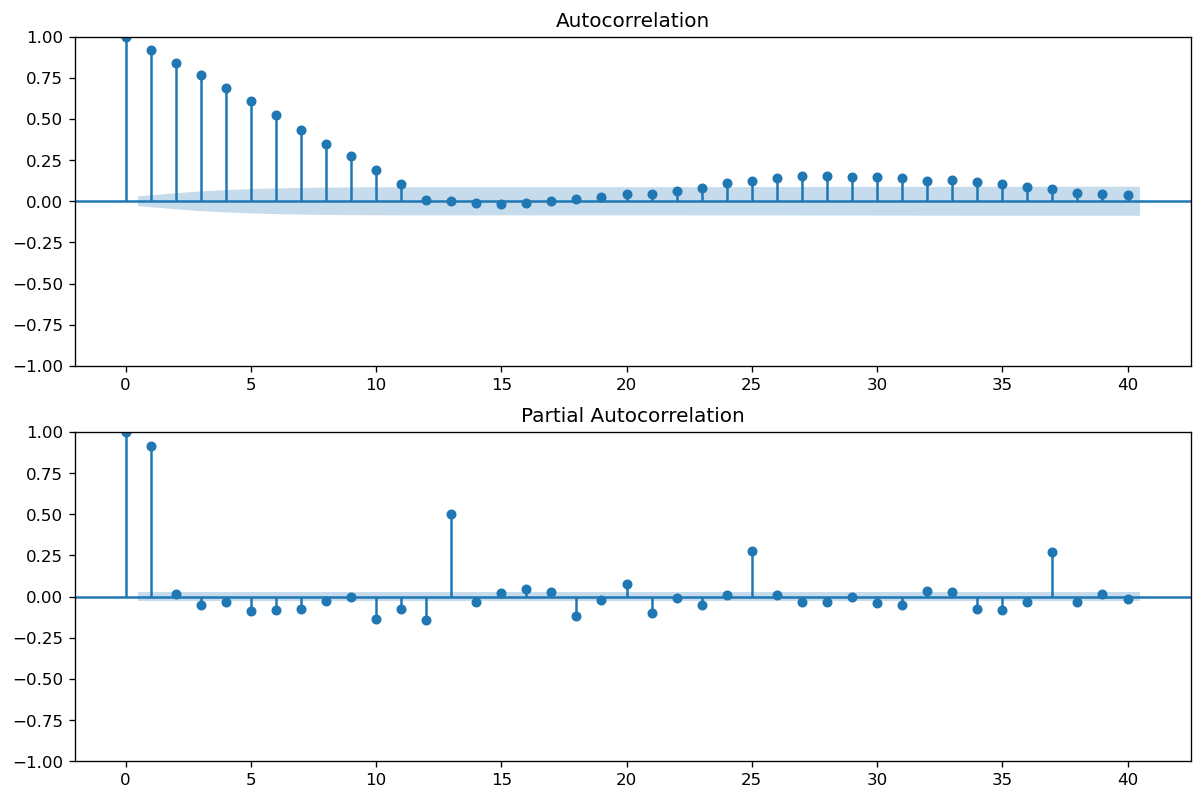

In [333]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [347]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['price'],order=(5,1,0))
model_fit=model.fit()
model_fit.summary()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 4386
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -34707.363
Date:                Thu, 17 Nov 2022   AIC                          69426.727
Time:                        21:34:35   BIC                          69465.042
Sample:                             0   HQIC                         69440.245
                               - 4386                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0368      0.007     -5.591      0.000      -0.050      -0.024
ar.L2          0.0082      0.006      1.357      0.175      -0.004       0.020
ar.L3          0.0107      0.007      1.639      0.101      -0.002       0.023
ar.L4          0.0269      0.005      4.921      0.000       0.016       0.038
ar.L5          0.0105      0.006      1.735      0.083      -0.001       0.022
sigma2      4.395e+05   2453.519    179.114      0.000    4.35e+05    4.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            140827.50
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):            1845.45   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='date'>

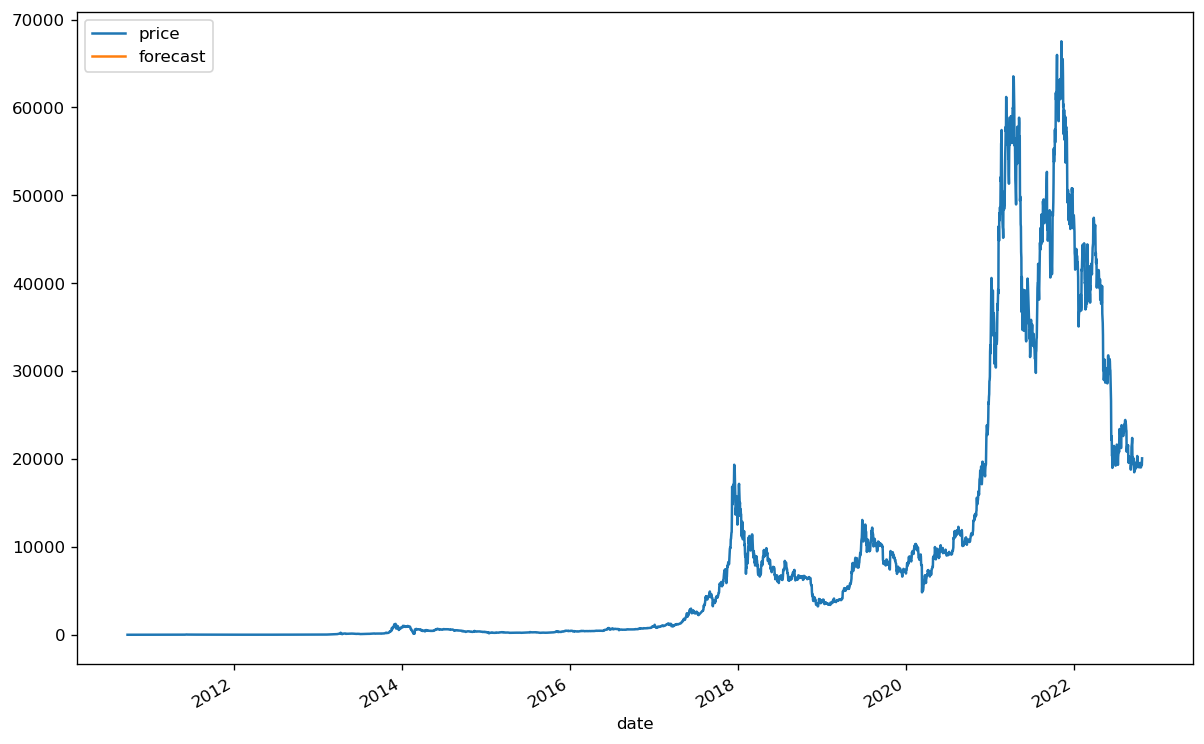

In [348]:
df['forecast']=model_fit.predict(start=90,end=6303,dynamic=True)
df[['price','forecast']].plot(figsize=(12,8))

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='date'>

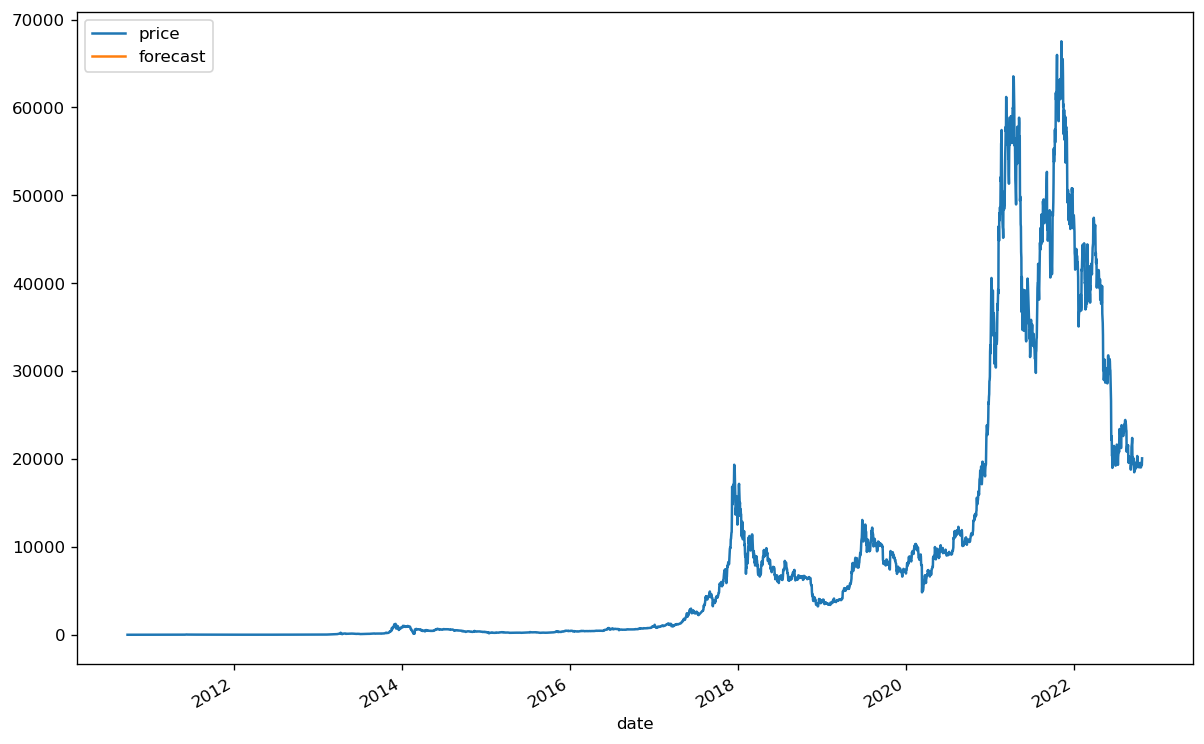

In [344]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=4500,dynamic=True)
df[['price','forecast']].plot(figsize=(12,8))

<AxesSubplot:>

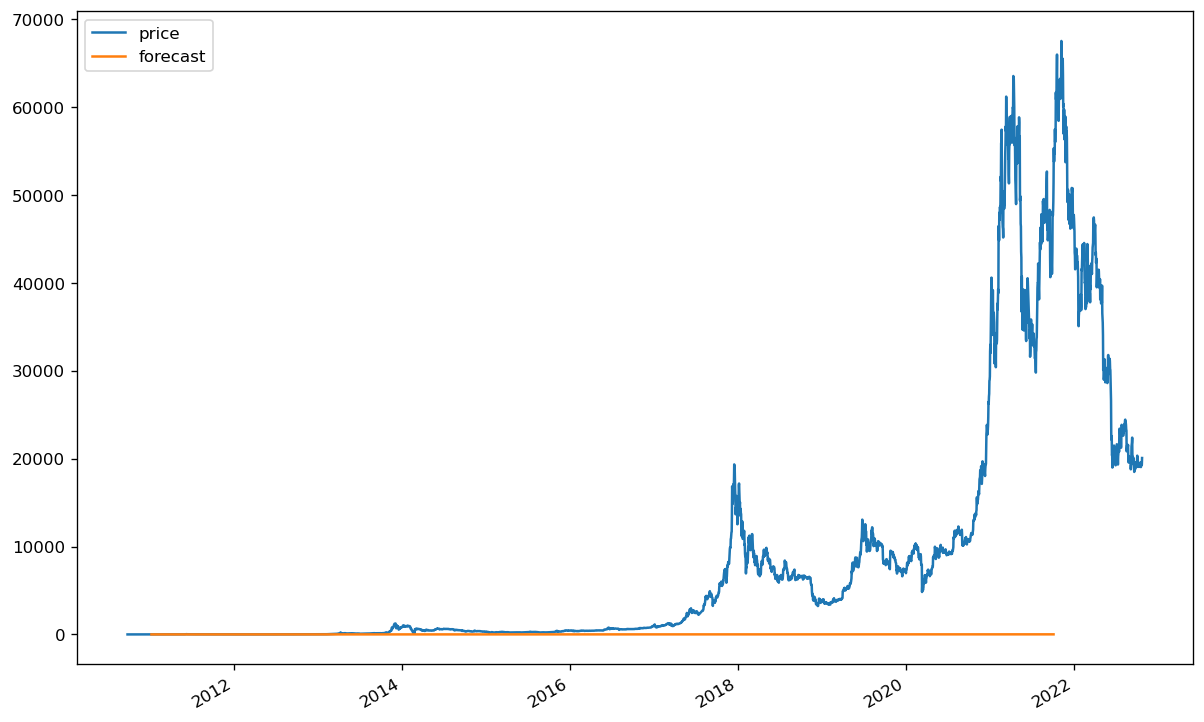

In [346]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 4000, dynamic= True)
future_df[['price', 'forecast']].plot(figsize=(12, 8))